# Final Project Submission

Please fill out:
* Student name: Bosco Mukara
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


# PROJECT OVERVIEW

The company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


In [1]:
#Importing relevant libraries;

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Learning the shape of object types of our data

df = pd.read_csv('data/Aviation_Data.csv', low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Data Understanding
This will help us in accessing data and exploring it using tables; it will will also enable us to determine the quality of data in project documentation.

In [3]:
#Getting information of the dataframe

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(90348, 31)

# Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [5]:
#Exploring the individual columns;

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#Checking for duplicates in aour dataset

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90343    False
90344    False
90345    False
90346    False
90347    False
Length: 90348, dtype: bool

In [7]:
#Checking for missing values in percentage in order to know which columns are of no or less importance to my analysis.

df.isnull().mean()*100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [8]:
#Here I want to drop columns that are of less or no use in our data

df.drop(columns= ['Longitude','FAR.Description','Air.carrier', 'Investigation.Type','Latitude','Schedule','Airport.Code'],inplace = True)

In [9]:

df.shape

(90348, 24)

In [10]:
#Investigating my data again after dropping columns of less use to my analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Airport.Name            52704 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Aircraft.Category       32287 non-null  object 
 9   Registration.Number     87507 non-null  object 
 10  Make                    88826 non-null  object 
 11  Model                   88797 non-null  object 
 12  Amateur.Built           88787 non-null  object 
 13  Number.of.Engines       82805 non-null  float64
 14  Engine.Type             81793 non-null

In [11]:
#Saving a copy of my data 
df = df.copy()

# Handling of missing values
So handling missing data is important for accurate data analysis and building robust models.This can be achieved through dropping the data completly or through imputation.

In [12]:
#Summary statistics

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
#Dropping rows with missing data

df.dropna(subset = df.select_dtypes(include = ['object']).columns,inplace=True)

In [14]:
df.shape

(4468, 24)

In [15]:
#Checking for missing values
df.isnull().mean()*100

Event.Id                   0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Airport.Name               0.000000
Injury.Severity            0.000000
Aircraft.damage            0.000000
Aircraft.Category          0.000000
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          0.111907
Engine.Type                0.000000
Purpose.of.flight          0.000000
Total.Fatal.Injuries      49.059982
Total.Serious.Injuries    48.030439
Total.Minor.Injuries      42.121755
Total.Uninjured           11.078782
Weather.Condition          0.000000
Broad.phase.of.flight      0.000000
Report.Status              0.000000
Publication.Date           0.000000
dtype: float64

In [16]:
#Assigning our continuous data to a new variables in order to generate a pandas dataframe

continuous_data = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Number.of.Engines']
continuous_data

['Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Number.of.Engines']

In [17]:
#Imputing missing values with mean

df[continuous_data] = df[continuous_data].fillna(df[continuous_data].median())
df[continuous_data]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
7,0.0,0.0,0.0,2.0,1.0
8,0.0,0.0,0.0,2.0,2.0
13,1.0,0.0,0.0,0.0,1.0
16,0.0,0.0,0.0,1.0,1.0
18,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
63899,1.0,1.0,0.0,1.0,2.0
63901,0.0,0.0,0.0,1.0,1.0
63909,1.0,0.0,0.0,1.0,1.0
63910,0.0,0.0,0.0,1.0,1.0


In [18]:
#Final confirmation of missing values in our dataset

df.isnull().sum()

Event.Id                  0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

# Detecting and Handling of Outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample of data or population.
They are likely to skew our data if not well handled.

In [19]:
Q1 = df['Total.Serious.Injuries'].quantile(0.25)
Q3 = df['Total.Serious.Injuries'].quantile(0.75)
IQR = Q3 - Q1
outliers= df[(df['Total.Serious.Injuries']<(Q1 - 1.5 * IQR)) | (df['Total.Serious.Injuries']>(Q3 - 1.5 * IQR))]
outliers


,Event.Id,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
44,20020917X01651,ANC82FA012,1982-01-05,"BETHEL, AK",United States,BETHEL,Non-Fatal,Substantial,Airplane,N3343S,...,Reciprocating,Unknown,0.0,2.0,0.0,0.0,VMC,Takeoff,Probable Cause,05-01-1983
55,20020917X01881,CHI82FA024,1982-01-08,"NEW PHILADELPHI, OH",United States,HARRY CLEVER FIELD,Fatal(1),Destroyed,Airplane,N207CB,...,Reciprocating,Personal,1.0,1.0,0.0,0.0,VMC,Approach,Probable Cause,08-01-1983
63,20020917X02246,LAX82DVG12,1982-01-09,"NAPA, CA",United States,NAPA,Non-Fatal,Substantial,Airplane,N731NZ,...,Reciprocating,Personal,0.0,1.0,0.0,3.0,VMC,Landing,Probable Cause,09-01-1983
68,20020917X02341,MIA82DA032,1982-01-10,"OKEECHOBEE, FL",United States,LOWERY DAVIS,Non-Fatal,Destroyed,Airplane,N567V,...,Reciprocating,Unknown,0.0,2.0,0.0,0.0,UNK,Approach,Probable Cause,10-01-1983
76,20020917X01965,DEN82FA017,1982-01-11,"RIVERTON, WY",United States,RIVERTON REGIONAL,Fatal(4),Destroyed,Airplane,N6558A,...,Reciprocating,Personal,4.0,1.0,1.0,0.0,IMC,Takeoff,Probable Cause,11-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63776,20071130X01879,DFW08FA038,2007-11-27,"Tulsa, OK",United States,Richard Lloyd Jones airport,Fatal(2),Destroyed,Airplane,N3NG,...,Reciprocating,Personal,2.0,1.0,0.0,0.0,VMC,Climb,Probable Cause,28-12-2008
63777,20080109X00035,NYC08CA048,2007-11-28,"LATROBE, PA",United States,Arnold Palmer Regional Airport,Non-Fatal,Substantial,Airplane,N103JT,...,Reciprocating,Personal,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause,31-03-2008
63806,20080122X00089,CHI08CA020,2007-12-05,"HAZELTON, IN",United States,Snider Field,Non-Fatal,Substantial,Helicopter,N75068,...,Reciprocating,Personal,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause,28-02-2008
63847,20071226X01986,DEN08LA041,2007-12-15,"Phillipsburg, KS",United States,Phillipsburg Municipal,Non-Fatal,Destroyed,Airplane,N63LH,...,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,24-12-2008


In [20]:
Q1 = df['Total.Fatal.Injuries'].quantile(0.25)
Q3 = df['Total.Fatal.Injuries'].quantile(0.75)
IQR = Q3 - Q1
outliers1= df[(df['Total.Fatal.Injuries']<(Q1 - 1.5 * IQR)) | (df['Total.Fatal.Injuries']>(Q3 - 1.5 * IQR))]
outliers1

,Event.Id,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
13,20020917X02134,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,N758SK,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
25,20020917X01905,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,HANOVER COUNTY,Fatal(8),Destroyed,Airplane,N2620L,...,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
26,20020917X01720,ATL82FA033,1982-01-03,"PINEHURST, NC",United States,MOORE COUNTY,Fatal(1),Destroyed,Airplane,N10VS,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
37,20020917X02304,LAX82FUM06,1982-01-05,"RAMONA, CA",United States,RAMONA,Fatal(3),Destroyed,Airplane,N4520K,...,Reciprocating,Business,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,05-01-1983
39,20020917X01906,DCA82AA009,1982-01-05,"ITHACA, NY",United States,TOMPKINS COUNTY,Fatal(2),Destroyed,Airplane,N546BA,...,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63828,20071219X01978,SEA08FA042,2007-12-10,"Salmon, ID",United States,Lemhi County Airport,Fatal(2),Destroyed,Airplane,N925TT,...,Turbo Prop,Executive/corporate,2.0,0.0,0.0,2.0,IMC,Takeoff,Probable Cause,04-08-2011
63833,20071227X01998,NYC08LA059,2007-12-12,"STATESVILLE, NC",United States,Statesville Regional,Fatal(1),Substantial,Airplane,N199JW,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009
63871,20080102X00007,CHI08FA053,2007-12-20,"Springfield, IL",United States,Abraham Lincoln Capital Arpt,Fatal(3),Destroyed,Airplane,N17784,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Approach,Probable Cause,10-05-2010
63899,20080108X00030,CHI08FA055,2007-12-27,"Traverse City, MI",United States,Cherry Capital Airport,Fatal(1),Destroyed,Airplane,N37249,...,Reciprocating,Personal,1.0,1.0,0.0,1.0,IMC,Approach,Probable Cause,05-08-2011


In [21]:
Q1 = df['Number.of.Engines'].quantile(0.25)
Q3 = df['Number.of.Engines'].quantile(0.75)
IQR = Q3 - Q1
outliers2= df[(df['Number.of.Engines']<(Q1 - 1.5 * IQR)) | (df['Number.of.Engines']>(Q3 - 1.5 * IQR))]
outliers2

,Event.Id,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
25,20020917X01905,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,HANOVER COUNTY,Fatal(8),Destroyed,Airplane,N2620L,...,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
26,20020917X01720,ATL82FA033,1982-01-03,"PINEHURST, NC",United States,MOORE COUNTY,Fatal(1),Destroyed,Airplane,N10VS,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
39,20020917X01906,DCA82AA009,1982-01-05,"ITHACA, NY",United States,TOMPKINS COUNTY,Fatal(2),Destroyed,Airplane,N546BA,...,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983
45,20020917X02423,MKC82DA016,1982-01-06,"ROLLA, MO",United States,DOWNTOWN,Non-Fatal,Substantial,Airplane,N2672A,...,Reciprocating,Executive/corporate,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,06-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63834,20080123X00097,NYC08CA073,2007-12-12,"MUSCLE SHOALS, AL",United States,Muscle Shoals,Non-Fatal,Substantial,Airplane,N112ED,...,Turbo Prop,Personal,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,17-06-2019
63836,20080123X00094,NYC08CA072,2007-12-13,"LANCASTER, PA",United States,Lancaster Airport,Non-Fatal,Substantial,Airplane,N777EV,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,28-02-2008
63841,20080213X00187,NYC08LA062B,2007-12-14,"NEW YORK, NY",United States,John F. Kennedy International,Non-Fatal,Substantial,Airplane,N184JB,...,Turbo Fan,Positioning,0.0,0.0,0.0,5.0,IMC,Standing,Probable Cause,30-09-2009
63862,20080312X00298,MIA08CA046,2007-12-19,"PITTSBURGH, PA",United States,Alleghney County Airport,Non-Fatal,Substantial,Airplane,N13616,...,Turbo Jet,Ferry,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,31-03-2008


In [22]:
Q1 = df['Total.Minor.Injuries'].quantile(0.25)
Q3 = df['Total.Minor.Injuries'].quantile(0.75)
IQR = Q3 - Q1
outliers3= df[(df['Total.Minor.Injuries']<(Q1 - 1.5 * IQR)) | (df['Total.Minor.Injuries']>(Q3 - 1.5 * IQR))]
outliers3

,Event.Id,Accident.Number,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
30,20020917X01992,FTW82DA036,1982-01-03,"FORT WORTH, TX",United States,OAK GROVE,Non-Fatal,Substantial,Airplane,N71054,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Approach,Probable Cause,03-01-1983
35,20020917X01991,FTW82DA035,1982-01-04,"ESTANCIA, NM",United States,ESTANCIA MUNICIPAL,Non-Fatal,Substantial,Airplane,N32335,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Cruise,Probable Cause,04-01-1983
76,20020917X01965,DEN82FA017,1982-01-11,"RIVERTON, WY",United States,RIVERTON REGIONAL,Fatal(4),Destroyed,Airplane,N6558A,...,Reciprocating,Personal,4.0,1.0,1.0,0.0,IMC,Takeoff,Probable Cause,11-01-1983
93,20020917X02538,NYC82FA021,1982-01-15,"JAMAICA, NY",United States,JOHN F. KENNEDY INT'L,Non-Fatal,Substantial,Airplane,N341PL,...,Turbo Prop,Unknown,0.0,1.0,2.0,12.0,VMC,Takeoff,Probable Cause,15-01-1983
101,20020917X02159,LAX82DA042,1982-01-17,"HONOLULU, HI",United States,HONOLULU INTL,Non-Fatal,Destroyed,Airplane,N21DR,...,Reciprocating,Unknown,0.0,0.0,2.0,1.0,VMC,Takeoff,Probable Cause,17-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63838,20071219X01976,MIA08LA029,2007-12-13,"MARATHON, FL",United States,The Florida Keys Marathon Airp,Non-Fatal,Substantial,Airplane,N801VC,...,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Cruise,Probable Cause,14-01-2009
63847,20071226X01986,DEN08LA041,2007-12-15,"Phillipsburg, KS",United States,Phillipsburg Municipal,Non-Fatal,Destroyed,Airplane,N63LH,...,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,24-12-2008
63872,20080204X00134,DFW08CA048,2007-12-21,"ELMENDORF, TX",United States,Elmendorf,Non-Fatal,Substantial,Airplane,N131RV,...,Reciprocating,Personal,0.0,0.0,1.0,1.0,VMC,Landing,Probable Cause,28-02-2008
63880,20080207X00157,LAX08CA041,2007-12-22,"HOLBROOK, AZ",United States,Holbrook,Non-Fatal,Substantial,Airplane,N418MS,...,Reciprocating,Personal,0.0,0.0,2.0,2.0,VMC,Landing,Probable Cause,28-02-2008


# Grouping and Aggregation of Data 
This will help in breaking down large datasets into manageable summaries.Here data will be grouped based on different categories in order to compare how they relate and make summary based on the findings.This will make it easy in coming up with prediction models or giving ideas aimed at making the enterprise better.

In [23]:

df.groupby(['Purpose.of.flight', 'Aircraft.Category'])['Total.Fatal.Injuries'].mean()

Purpose.of.flight        Aircraft.Category
Aerial Application       Airplane             0.013514
                         Helicopter           0.000000
Aerial Observation       Airplane             0.000000
                         Helicopter           0.000000
Air Race/show            Airplane             0.285714
                         Helicopter           0.000000
Banner Tow               Airplane             0.000000
Business                 Airplane             0.385650
                         Helicopter           0.066667
Executive/corporate      Airplane             0.685185
                         Helicopter           0.333333
External Load            Helicopter           0.000000
Ferry                    Airplane             0.145833
                         Helicopter           0.000000
Flight Test              Airplane             0.071429
                         Gyrocraft            0.000000
                         Helicopter           0.200000
Glider Tow            

In [24]:
df.groupby(['Engine.Type','Weather.Condition'])['Total.Fatal.Injuries'].mean()

Engine.Type    Weather.Condition
Reciprocating  IMC                   0.919075
               UNK                   0.142857
               VMC                   0.118364
Turbo Fan      IMC                  16.250000
               VMC                   0.250000
Turbo Jet      IMC                   0.000000
               VMC                   0.294118
Turbo Prop     IMC                   1.200000
               UNK                   0.000000
               VMC                   0.638889
Turbo Shaft    IMC                   4.000000
               VMC                   0.182796
Unknown        VMC                   0.100000
Name: Total.Fatal.Injuries, dtype: float64

In [25]:
df.groupby(['Weather.Condition', 'Model'])['Total.Fatal.Injuries'].mean()

Weather.Condition  Model              
IMC                109E                   1.0
                   110P1                  1.0
                   150                    0.5
                   150B                   0.0
                   150J                   0.0
                                         ... 
VMC                Zenith Tri-Z           0.0
                   Zodiac (CH-601-HDS)    0.0
                   Zodiac 601XL           0.0
                   Zodiac CH 601 HDS      0.0
                   sportstar              0.0
Name: Total.Fatal.Injuries, Length: 1611, dtype: float64

In [26]:
df.groupby(['Engine.Type', 'Make'])['Total.Serious.Injuries'].mean()

Engine.Type    Make             
Reciprocating  Ac Mfg & Dev't Co    0.000000
               Ackert               0.000000
               Acro Sport           0.000000
               Adkins               0.000000
               Aero Commander       0.285714
                                      ...   
Unknown        Menees               1.000000
               Raven                0.000000
               Schleicher           0.375000
               Schreder             0.000000
               Schweizer            0.312500
Name: Total.Serious.Injuries, Length: 631, dtype: float64

In [27]:
df.groupby(['Injury.Severity', 'Number.of.Engines'])['Total.Serious.Injuries'].mean()

Injury.Severity  Number.of.Engines
Fatal(1)         0.0                   0.750000
                 1.0                   0.355372
                 2.0                   0.382353
Fatal(10)        2.0                   0.000000
Fatal(12)        2.0                   0.000000
Fatal(13)        2.0                   0.000000
Fatal(14)        2.0                   0.000000
Fatal(16)        2.0                   6.000000
Fatal(17)        1.0                   0.000000
Fatal(2)         1.0                   0.178571
                 2.0                   0.150000
                 3.0                   4.000000
Fatal(228)       4.0                  26.000000
Fatal(27)        2.0                   9.000000
Fatal(3)         1.0                   0.272727
                 2.0                   0.000000
Fatal(4)         1.0                   0.150000
                 2.0                   0.000000
Fatal(5)         1.0                   0.142857
                 2.0                   1.000000
Fatal

# Data Visualization
Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze.
Here different visualizations will be generated tio show how different factors relate.

In [28]:
#Assigning my continuous data to a new variable in order to find correlation

data = df.select_dtypes(include=[np.number])
data


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
7,1.0,0.0,0.0,0.0,2.0
8,2.0,0.0,0.0,0.0,2.0
13,1.0,1.0,0.0,0.0,0.0
16,1.0,0.0,0.0,0.0,1.0
18,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
63899,2.0,1.0,1.0,0.0,1.0
63901,1.0,0.0,0.0,0.0,1.0
63909,1.0,1.0,0.0,0.0,1.0
63910,1.0,0.0,0.0,0.0,1.0


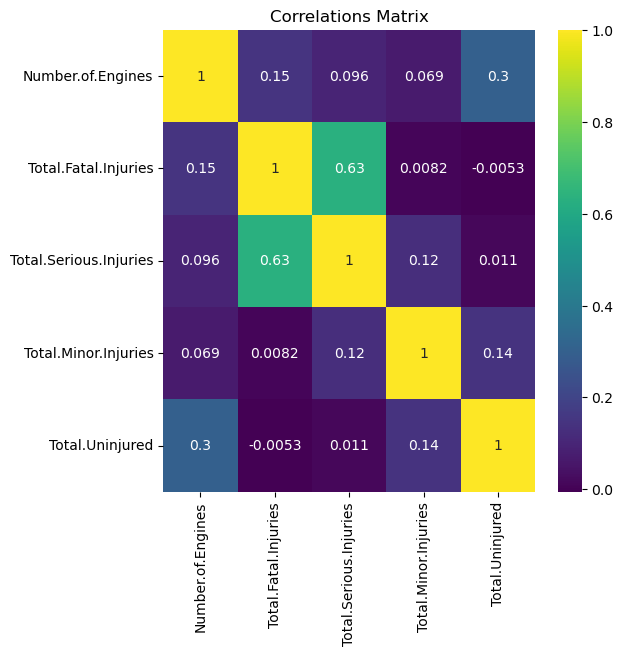

In [29]:
#Correlations

plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlations Matrix')
plt.show()

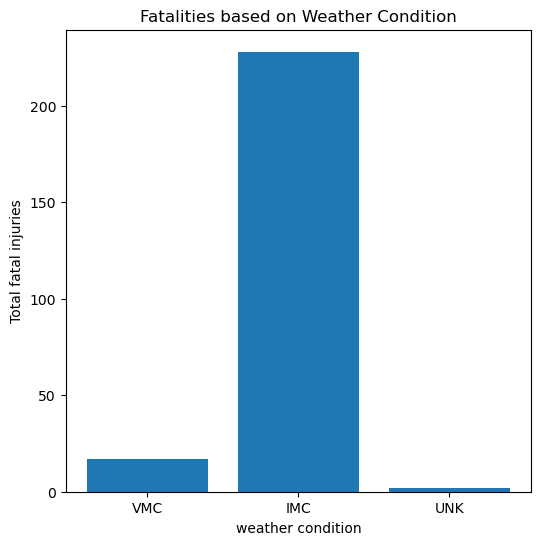

In [30]:
#Plotting total fatal cases against weather condition

plt.figure(figsize = (6 ,6))
plt.bar(df['Weather.Condition'], df['Total.Fatal.Injuries'])
plt.title('Fatalities based on Weather Condition')
plt.ylabel('Total fatal injuries')
plt.xlabel('weather condition')
plt.show()

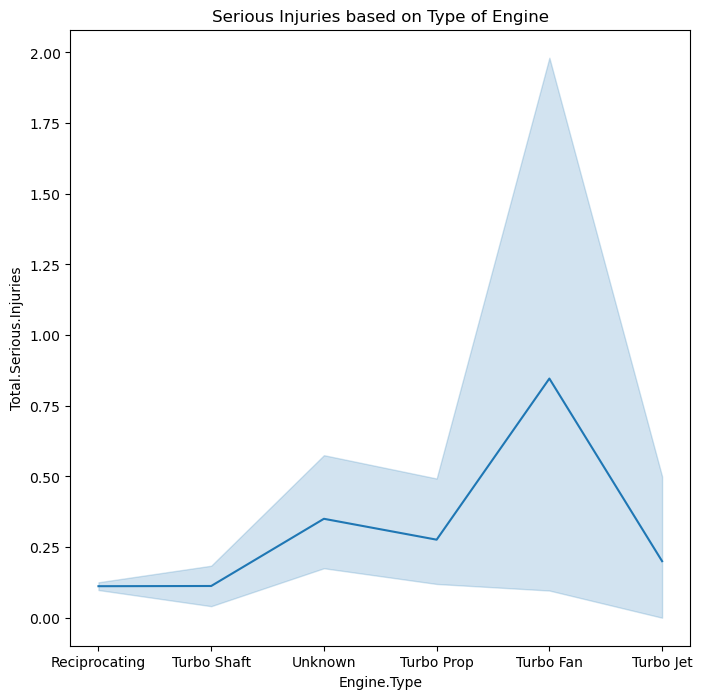

In [60]:
#Scatterplot showing serious injuries based on type of engine
plt.figure(figsize = (8 ,8))
sns.lineplot(x = 'Engine.Type', y = 'Total.Serious.Injuries', data = df)
plt.title('Serious Injuries based on Type of Engine')
plt.savefig('my_line_plot.png') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

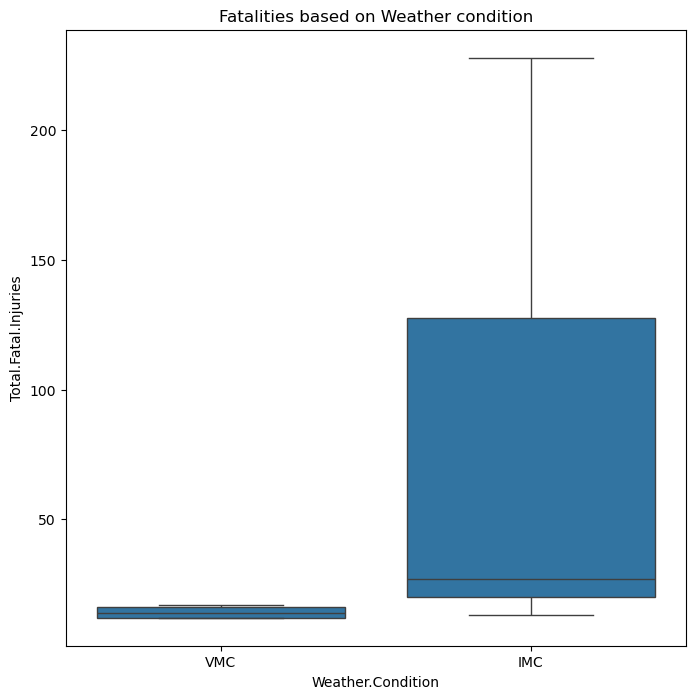

In [32]:
plt.figure(figsize = (8, 8))
sns.boxplot(y = 'Total.Fatal.Injuries',x = 'Weather.Condition', data = df[df['Total.Fatal.Injuries']>10])
plt.title('Fatalities based on Weather condition')
plt.show

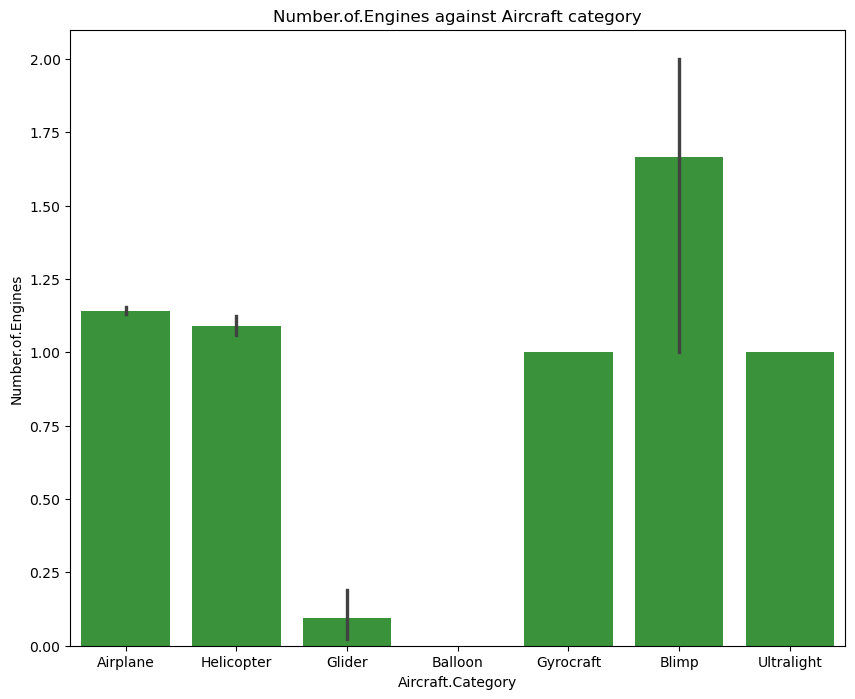

In [66]:

plt.figure(figsize = (10, 8))
sns.barplot(y = 'Number.of.Engines',x = 'Aircraft.Category', data = df)
sns.barplot(y = 'Number.of.Engines',x = 'Aircraft.Category', data = df)
sns.barplot(y = 'Number.of.Engines',x = 'Aircraft.Category', data = df)
plt.title('Number.of.Engines against Aircraft category')
plt.show()

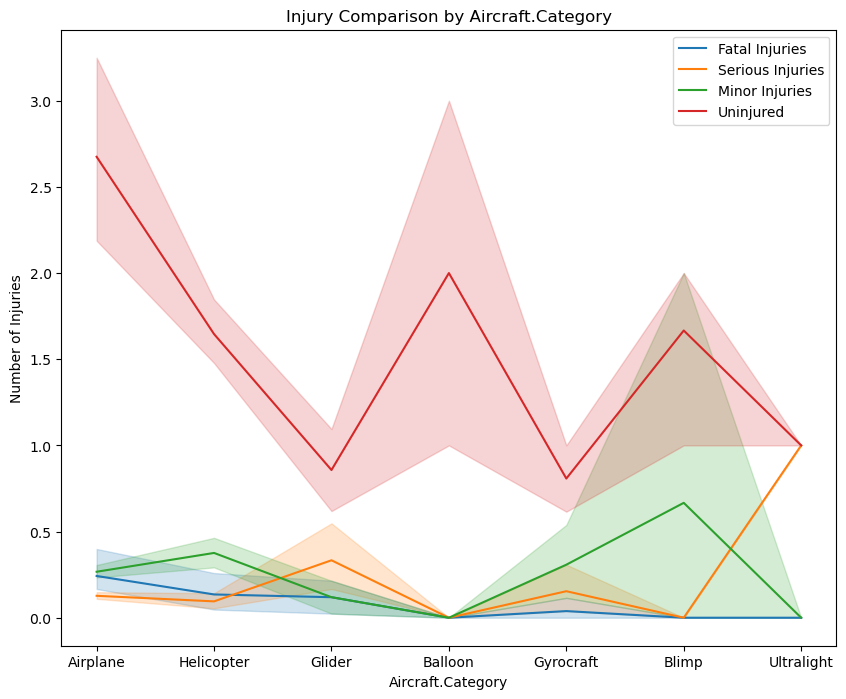

In [56]:
plt.figure(figsize=(10, 8))

# Plot different injury types 

sns.lineplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=df, label='Fatal Injuries')
sns.lineplot(x='Aircraft.Category', y='Total.Serious.Injuries', data=df, label='Serious Injuries')
sns.lineplot(x='Aircraft.Category', y='Total.Minor.Injuries', data=df, label='Minor Injuries')
sns.lineplot(x='Aircraft.Category', y='Total.Uninjured', data=df, label='Uninjured')

plt.title('Injury Comparison by Aircraft.Category')
plt.xlabel('Aircraft.Category')
plt.ylabel('Number of Injuries')

plt.legend()

plt.show()


In [50]:
#Saving my data as an excel file for further analysis or reference
import os

# Automatically get the path to the Desktop folder
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Print the Desktop path
print("Desktop path:", desktop_path)

# Save the Excel file to the Desktop
df.to_excel(os.path.join(desktop_path, 'filename.xlsx'), index=False)

Desktop path: /Users/user/Desktop
